# Importing the Libraries

In [2]:
! pip install dtale -q

     |████████████████████████████████| 14.4MB 2.0MB/s 
     |████████████████████████████████| 20.6MB 1.5MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 645kB 23.0MB/s 
     |████████████████████████████████| 79.9MB 47kB/s 
     |████████████████████████████████| 194kB 53.0MB/s 
     |████████████████████████████████| 1.8MB 34.0MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 1.1MB 35.3MB/s 
     |████████████████████████████████| 358kB 51.2MB/s 
     |████████████████████████████████| 3.7MB 37.4MB/s 
     |████████████████████████████████| 92kB 7.7MB/s 
     |████████████████████████████████| 1.8MB 32.5MB/s 


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# Reading the dataset


### From the following dataset it's clear all the values are categorical data type and inorder to get it 
### precessed into ML models we need to convert into numerical values.
### Hence we shall proceed with encoding the dataset

In [3]:
df = pd.read_csv("D:/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# We can see we have a total of 891 rows and 12 columns

In [4]:
df.shape

(891, 12)

# Preprocessing

## EDA using dtale library

####( some systems do not support this, kindly ignore this if the link doesn't open in your system)

In [5]:
import dtale
d_tale =  dtale.show(df)
d_tale

2021-07-18 13:31:57,106 - INFO     - NumExpr defaulting to 4 threads.


# Let's check the information of the dataset

#### We have 5 columns with object type, 2 columns with float type and the remaining 5 columns have int datatype

#### We can also see the columns "Age" and "Cabin" have missing values and we need to impute to proceed further

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Lets create a graph to obsrve the outcome of col "Survived"


### We understand very few people were saved (1) and majority of the paasengers died in that accident (0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

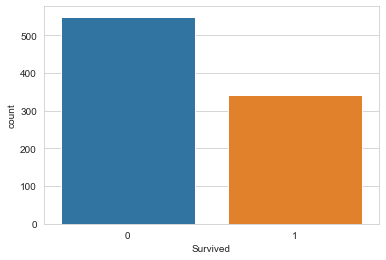

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df)

## Deduce the above graph to identify further stats on specific feature.

### I want to see how the survival rate based on "Sex"

### From this we can see, the majority of the "Male" passengers did not survie compared to "Females"

<AxesSubplot:xlabel='Survived', ylabel='count'>

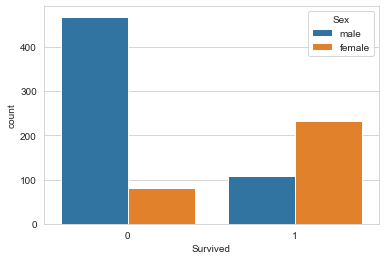

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=df)

# Let us now understand if there is an relationship with the survival rate of passengers and the compartment / class they resided in

##### Pclass 1 - High Class
##### Pclass 2 -  Middle Class
##### Pclass 3 - Lower class

### We can see that passengers from Pclass 3 have lost lives more than the other passengers

### But when it comes to survival, Pclass 3 passengers have sligjtly higher number that Pclass 2 passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

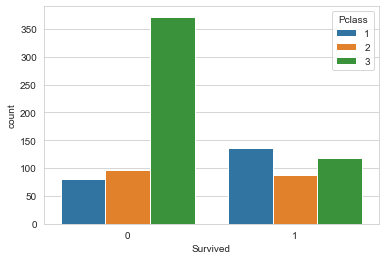

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=df)

# Lets check the distribution of the Age of teh passengers

## We can see the majority of the passengers were in the mid 20's, 30's and 40's. So basically from teenagers to middle aged in general. 

### Very few in the older section and children appear to be roughly aroud 5 years of age, give or take

<AxesSubplot:xlabel='Age'>

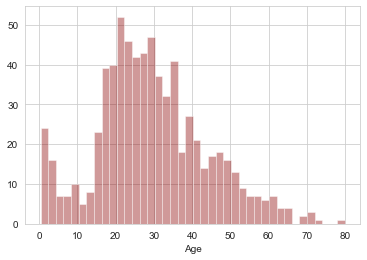

In [11]:
sns.distplot(df["Age"], kde=False, color="darkred", bins=40)

# Let's compare the features "Pclass" and "Age" using Box plots

## We can see there are outliers in Pclass 2 and Pclass 3

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

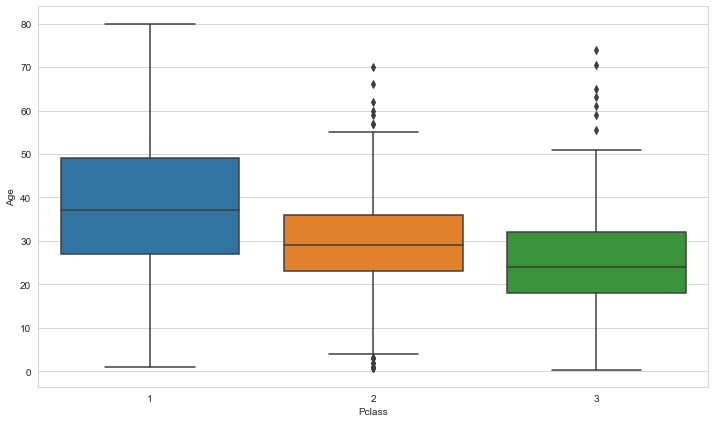

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=df)

# Stats of the all the features

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Heatmap to check missing values

## We can see columns "Age" and "Cabin" have misisng values

<AxesSubplot:>

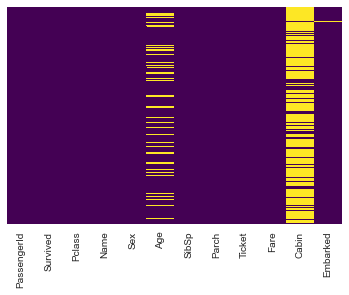

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# Imputing "Age" column with respect to the average age of "Pclass"

In [18]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [19]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age, axis =1)

# Heatmap to check missing values post imputing

<AxesSubplot:>

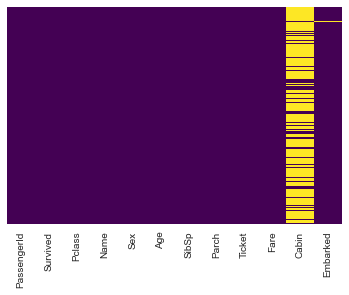

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

# We can now proceed to drop columns 

### Column "Cabin" has many misisng values hence we will drop this column altogether
### Columns "PassengerId", "Name" and "Ticket" don't seem to add any value to the model building, hence will drop these columns as well

In [21]:
df.drop(["Cabin", "PassengerId", "Name", "Ticket"], axis=1, inplace=True)

# Encode the categorical values "Sex" and "Embarked"

#### using get_dummies, then drop the columns

In [22]:
sex = pd.get_dummies(df["Sex"] ,drop_first=True)
embark = pd.get_dummies(df["Embarked"] ,drop_first=True)

In [23]:
df.drop(["Sex", "Embarked"], axis=1, inplace=True)

In [24]:
df = pd.concat([df, sex, embark], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Distribution of all the columns in the dataset

### we can observe that both "Age" and "Fare" are continous colums and appear to be a little skewed.

#### Lets remove the outliers to see if we can get better output

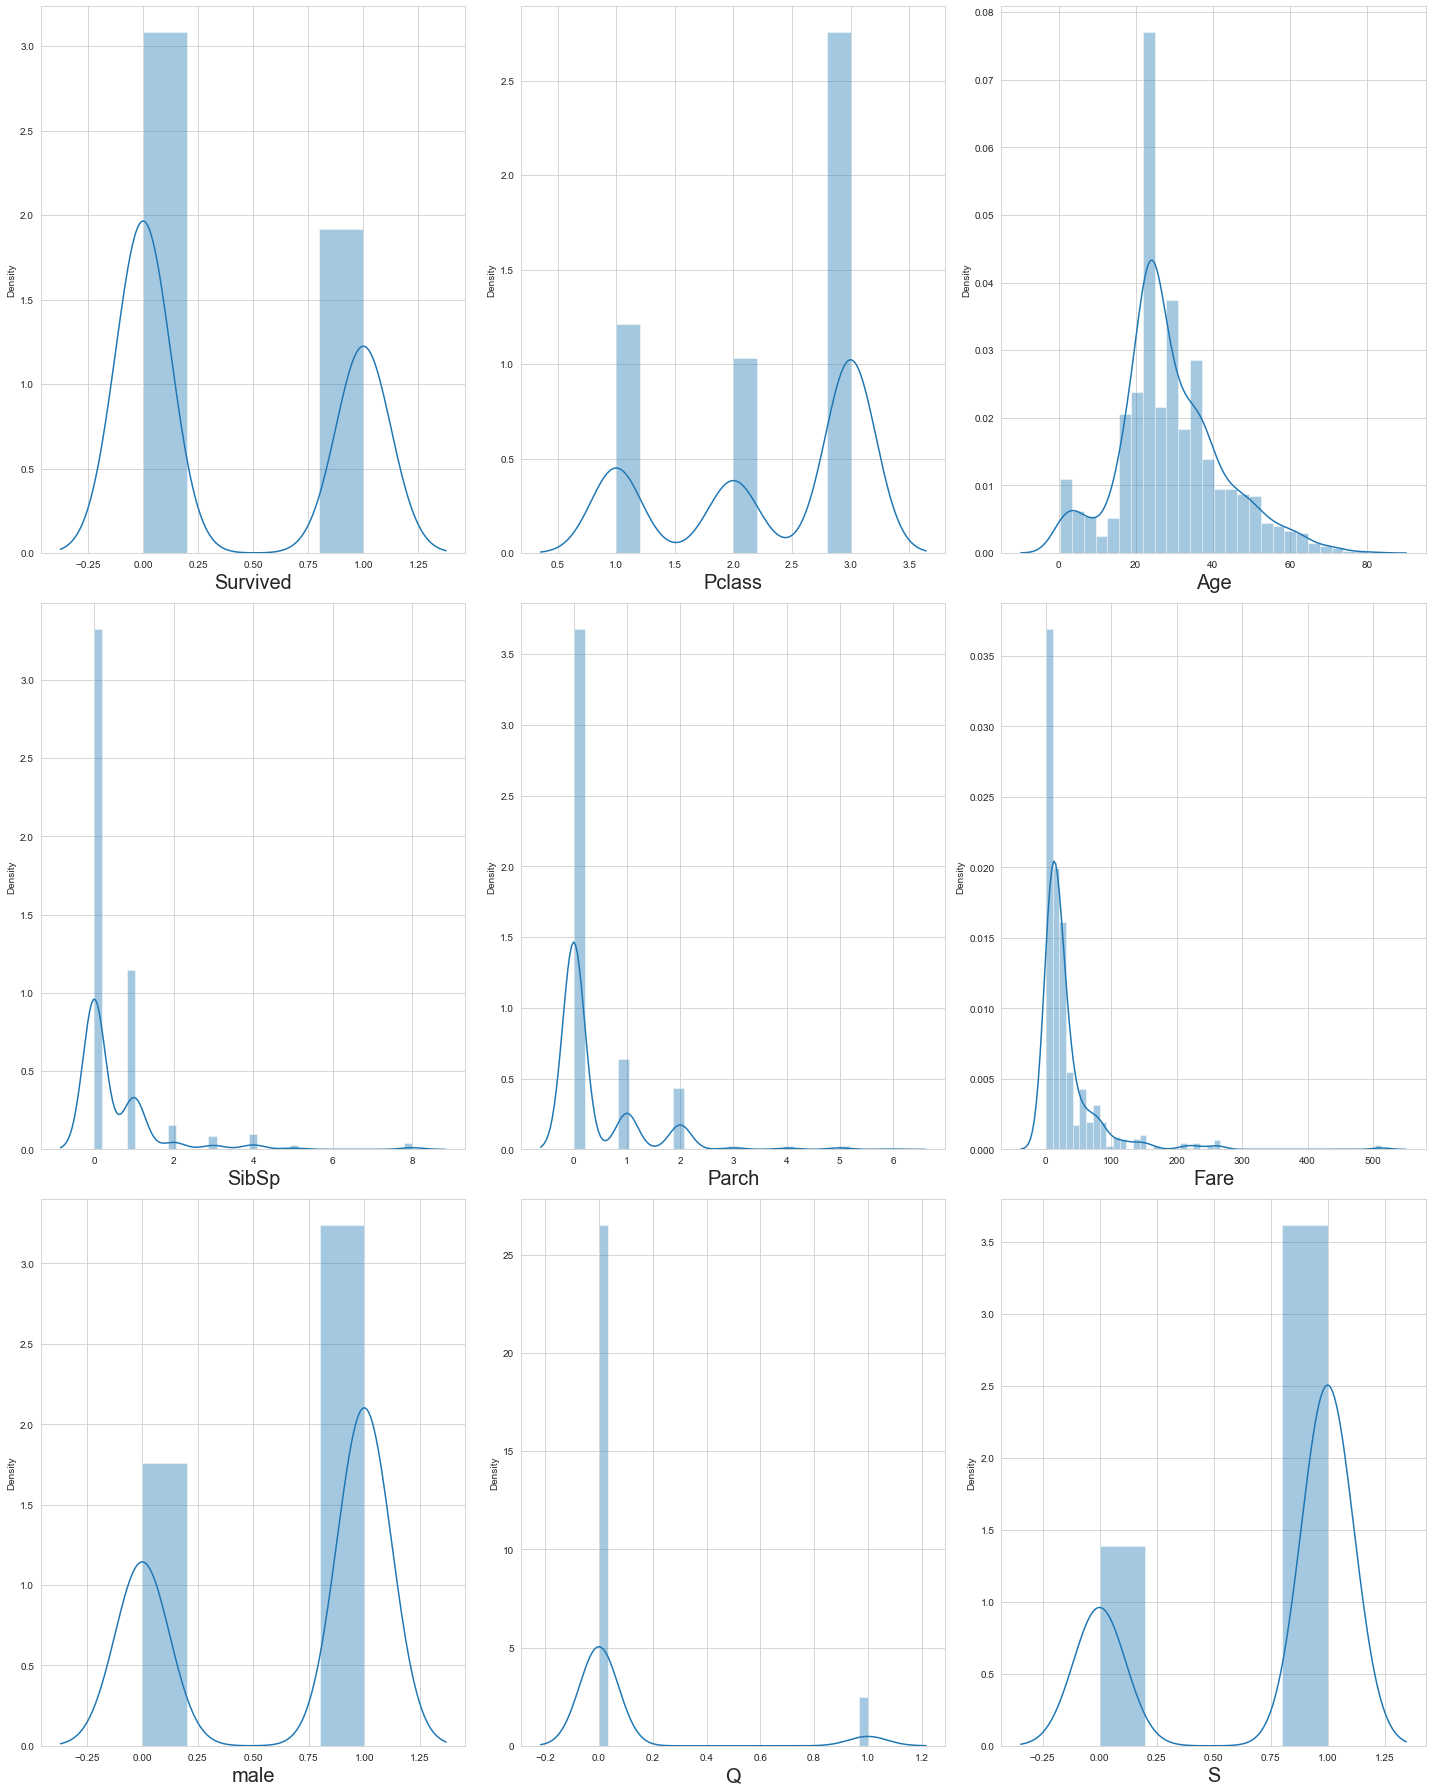

In [25]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

# Applying Z-score to identify and remove outliers
## It appears the dataset has removed / reduced outliers to some extent
### The stats show reduction of total values in the dataset to minimal extent only

In [26]:
from scipy.stats import zscore

z_score = zscore(df[['Age', 'Fare']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,2.343750,28.653553,0.520833,0.368056,26.500689,0.650463,0.087963,0.731481
std,0.485287,0.819028,12.724492,1.104937,0.794651,29.400192,0.477100,0.283405,0.443446
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,13.860400,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,29.775000,1.000000,0.000000,1.000000
max,1.000000,3.000000,66.000000,8.000000,6.000000,164.866700,1.000000,1.000000,1.000000


# Percentage of Data Loss
#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case its approximately 3.03% and not much of data is lost

In [27]:
# Percentage data loss:

loss_percent = (891-864)/891*100
print(loss_percent)

3.0303030303030303


#Distribution of all the columns in the dataset (post z-score)
#### Ignoring the categorical values, the dataset now appears to be normally distributed than before.

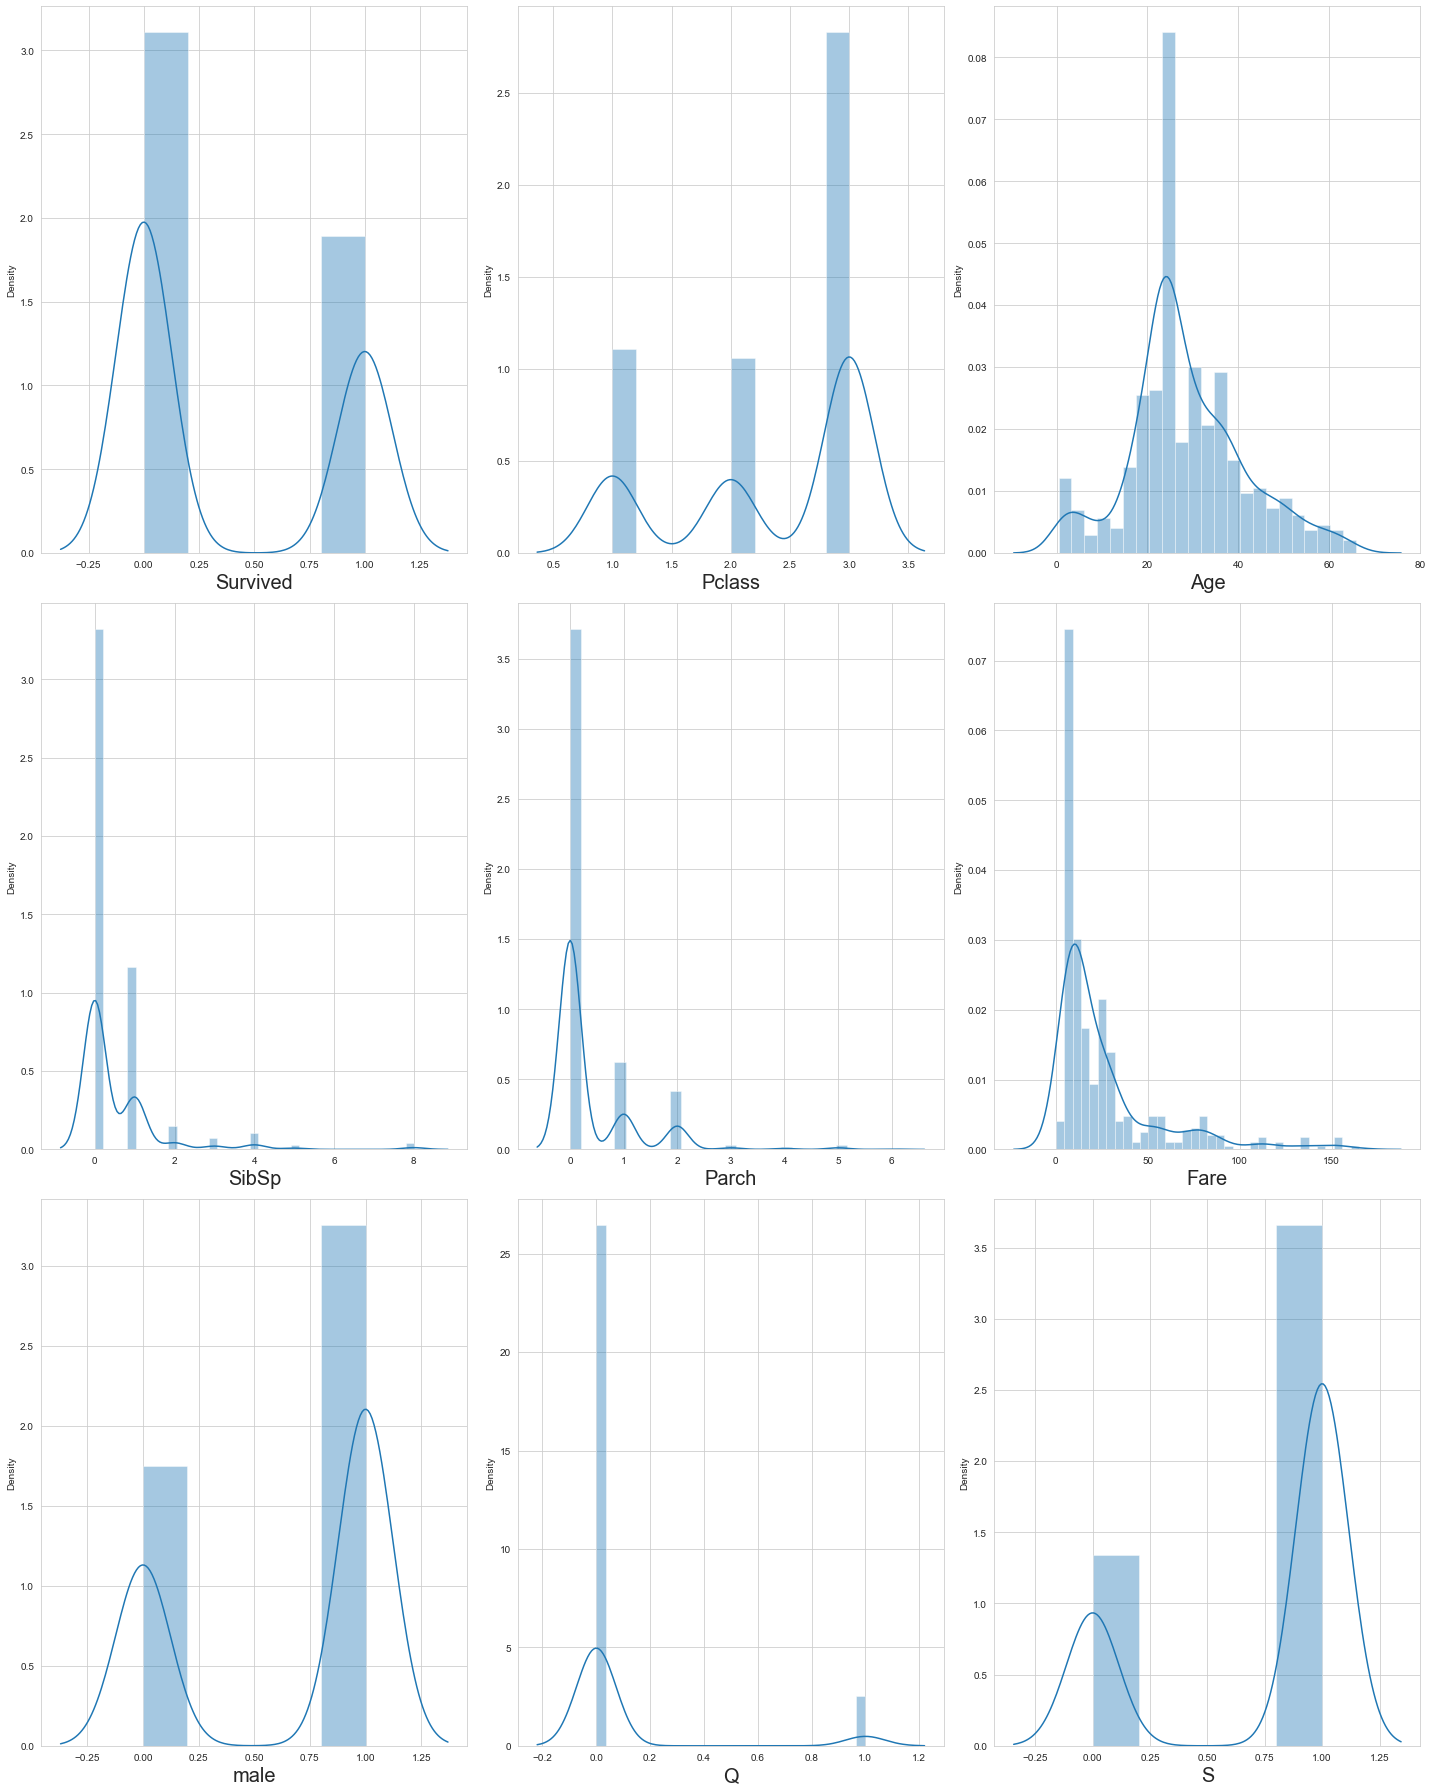

In [28]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Splitting up of dataset with x (features) and y (target column)

In [29]:
# splitting the columns

x = df.drop(columns = ["Survived"])
y = df["Survived"]

# Lets us now Scale the data for further processing.

## I am using StandardScaler in this scenario

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.8017188 , -0.52319628,  0.43391078, ...,  0.7330529 ,
        -0.31055869,  0.60587838],
       [-1.64161469,  0.73494958,  0.43391078, ..., -1.36415804,
        -0.31055869, -1.65049627],
       [ 0.8017188 , -0.20865981, -0.47164215, ..., -1.36415804,
        -0.31055869,  0.60587838],
       ...,
       [ 0.8017188 , -0.36592805,  0.43391078, ..., -1.36415804,
        -0.31055869,  0.60587838],
       [-1.64161469, -0.20865981, -0.47164215, ...,  0.7330529 ,
        -0.31055869, -1.65049627],
       [ 0.8017188 ,  0.26314488, -0.47164215, ...,  0.7330529 ,
         3.22000327, -1.65049627]])

# Finding variance inflation factor in each scaled column

#### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity

#### From the below observation, it appears there is no issue of multicolinearity for this dataset

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.363159,Pclass
1,1.303969,Age
2,1.381374,SibSp
3,1.340995,Parch
4,2.290348,Fare
5,1.137499,male
6,1.497149,Q
7,1.464207,S


# Check if the dataset is over sampling or under sampling

In [32]:
df["Survived"].value_counts()

0    537
1    327
Name: Survived, dtype: int64

## I will proceed with SMOTE technique for Over Sampling of dataset

### Although very few amount of values are imbalanced, I would still consider it to be imbalanced dataset because, the accuracy of the model after balancing the dataset was much better than the unbalanced dataset. 

In [33]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

#### Balanced dataset after SMOTE

In [34]:
y_over.value_counts()

0    537
1    537
Name: Survived, dtype: int64

# split the dataset into train and test data set

#### test_size value is same as above (30%) and random_state refers to teh output of "maxRS" variable as calculated in the previous step

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 6 ML models in thsi scenario

### 1) LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.826625386996904
[[126  26]
 [ 30 141]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       152
           1       0.84      0.82      0.83       171

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



### 2) DecisionTreeClassifier 

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8235294117647058
[[125  27]
 [ 30 141]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       152
           1       0.84      0.82      0.83       171

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



### 3) RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.848297213622291
[[127  25]
 [ 24 147]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       152
           1       0.85      0.86      0.86       171

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



### 4) GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8421052631578947
[[131  21]
 [ 30 141]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       152
           1       0.87      0.82      0.85       171

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



### 5) AdaBoostClassifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ad_class = AdaBoostClassifier()
ad_class.fit(x_train,y_train)

y_pred = ad_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.826625386996904
[[126  26]
 [ 30 141]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       152
           1       0.84      0.82      0.83       171

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



### 6) ExtraTreesClassifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8606811145510835
[[131  21]
 [ 24 147]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       152
           1       0.88      0.86      0.87       171

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



# Cross validation to check if its overfitting

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scr = cross_val_score(log_reg, x, y, cv=5)
print("Cross Validation score of LogisticRegression model is:", scr.mean())

Cross Validation score of LogisticRegression model is: 0.7939911278397634


In [46]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.7720190885871757


In [47]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.8090536362414303


In [53]:
scr = cross_val_score(gb_class, x, y, cv=5)
print("Cross Validation score of SVC model is:", scr.mean())

Cross Validation score of SVC model is: 0.8229466326119101


In [49]:
scr = cross_val_score(ad_class, x, y, cv=5)
print("Cross Validation score of AdaBoostClassifier model is:", scr.mean())

Cross Validation score of AdaBoostClassifier model is: 0.8090401935744052


In [50]:
scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.7882175023524668


# Selecting the best ML model for this dataset

### Its clear that we should proceed with ExtraTreesClassifier as the difference is lower compared to other models for this dataset in this scenario

| Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- |---|
| LogisticRegression | 0.826625386996904 | 0.793991127839763 | 0.032634259157141 |
| DecisionTreeClassifier | 0.823529411764705 | 0.772019088587175 | 0.0515103231775299 |
| RandomForestClassifier | 0.848297213622291 | 0.80905363624143 | 0.039243577380861 |
| GradientBoostingClassifier | 0.842105263157894 | 0.82294663261191 | 0.019158630545984 |
| AdaBoostClassifier | 0.826625386996904 | 0.809040193574405 | 0.017585193422499 |
| ExtraTreesClassifier | 0.860681114551083 | 0.788217502352466 | 0.072463612198617 |




# Hyper Parameter Tuning

### Let us try to tune the proposed model (ExtraTreesClassifier) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 6 paramaters

In [92]:
parameters = {"n_estimators": [100,200],
              "criterion": ["gini", "entropy"],
              "min_samples_split":[2,4],
              "min_samples_leaf": [1,2],
              "max_features":["auto","sqrt","log2"],
              "class_weight":["balanced","balanced_subsample"]
              }


### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [93]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [94]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            o...ne,
                                            verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
           

In [95]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was approximately 86.06 % earlier and post Hyper Parameter tuning its now approximately 86.37 % better 

In [63]:
mod_ext_tree = ExtraTreesClassifier(class_weight="balanced",criterion="entropy",max_features="log2", 
                                    min_samples_leaf= 2, min_samples_split= 4, n_estimators =200)

mod_ext_tree.fit(x_train,y_train)
pred = mod_ext_tree.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.37770897832817


# Saving the model (using joblib)

In [64]:
# Svaing the model

import joblib
joblib.dump(mod_ext_tree,"Titanic_Prediction.pkl")

['Titanic_Prediction.pkl']

# Loading the saved model

In [65]:
model = joblib.load("Titanic_Prediction.pkl")

In [66]:
prediction = model.predict(x_test)

In [67]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,1
2,0
3,0
4,1
...,...
318,1
319,0
320,1
321,1
